In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# chargement du dataset
df=pd.read_csv("mouse_viral_study.csv")

In [56]:
df.head()

,Med_1_mL,Med_2_mL,VIRUS
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


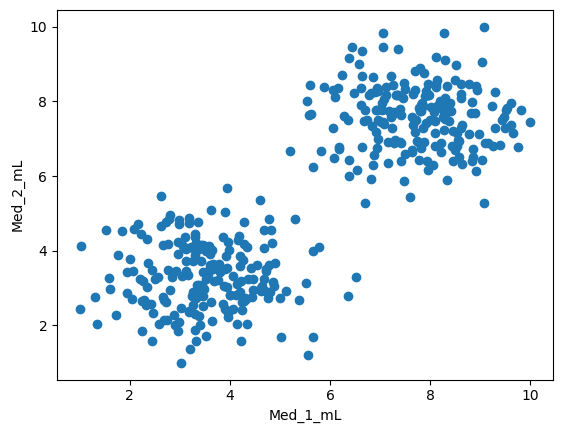

In [57]:
plt.plot(df["Med_2_mL"],df["Med_1_mL"],'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

In [58]:
X=df['Med_1_mL']
y=df['Med_2_mL']

In [59]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=np.array(X_train).reshape(-1, 1)
X_train.shape

(320, 1)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define maximum polynomial degree
max_degree = 20

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")



Best polynomial degree: 9


In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
# Create the polynomial features matrix
def create_polynomial_features(X, degree):
    #X_poly = np.ones((len(X), degree + 1))
    X_poly = np.zeros((len(X), degree))
    for i in range(degree):
        X_poly[:, i] = X ** (i + 1)
    return X_poly

X=create_polynomial_features(X, 17)
X.shape


(400, 17)

In [63]:
print(X)

[[6.50823109e+00 4.23570720e+01 2.75669613e+02 ... 1.59200520e+12
  1.03611377e+13 6.74326786e+13]
 [4.12611616e+00 1.70248346e+01 7.02464450e+01 ... 1.71049478e+09
  7.05770013e+09 2.91208906e+10]
 [6.42787048e+00 4.13175189e+01 2.65583660e+02 ... 1.32131619e+12
  8.49324936e+12 5.45935068e+13]
 ...
 [7.89532511e+00 6.23361586e+01 4.92164238e+02 ... 2.88768801e+13
  2.27992356e+14 1.80007378e+15]
 [2.69059196e+00 7.23928509e+00 1.94779623e+01 ... 2.80360999e+06
  7.54337050e+06 2.02961320e+07]
 [7.58782061e+00 5.75750216e+01 4.36868936e+02 ... 1.59131378e+13
  1.20746035e+14 9.16199250e+14]]


In [64]:
print(y.shape)
y = y.values.reshape(-1, 1)
# La ligne suivante affiche la forme de la matrice 'y', c'est-à-dire le nombre de lignes et de colonnes.
y.shape

(400,)


(400, 1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(320, 17)
(320, 1)
(80, 17)
(80, 1)


In [66]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))


In [67]:
print(X_test.shape)
print(X_train.shape)

(80, 18)
(320, 18)


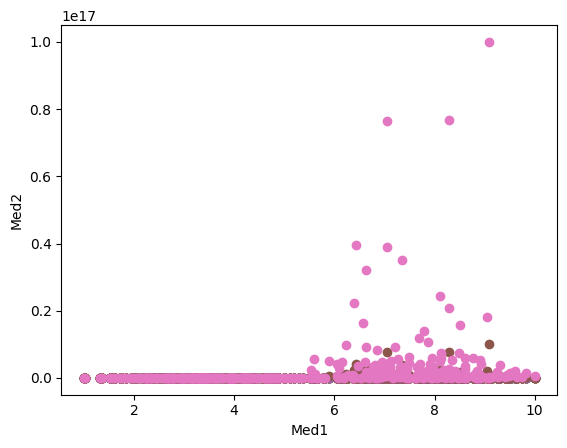

In [68]:
plt.plot(y,X,'o')
plt.xlabel('Med1')
plt.ylabel('Med2')
plt.show()

In [69]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(X_train.shape[1],1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]]


In [70]:
def model(X, theta):
    return np.dot(X, theta)

In [71]:
def cost_function(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)


In [72]:
def grad(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

In [73]:
def gradient_descent(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [74]:
cost_function(X_train, y_train, theta,1)

31.668283088843662

In [75]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations,1)

In [76]:
theta_final

array([[ 3.77098306e-01],
       [-3.57687824e-01],
       [ 6.95782982e-02],
       [ 5.63823661e-01],
       [ 4.17629919e-01],
       [-3.85522711e+00],
       [ 5.83595880e-02],
       [-1.74625499e+00],
       [-1.62331843e+00],
       [-3.37740225e-01],
       [-9.91508771e-01],
       [ 2.58657490e-01],
       [ 4.21444572e-03],
       [-7.13144469e-01],
       [ 6.20672812e-01],
       [ 3.15610110e+00],
       [-2.00093080e-01],
       [ 5.16791988e+00]])

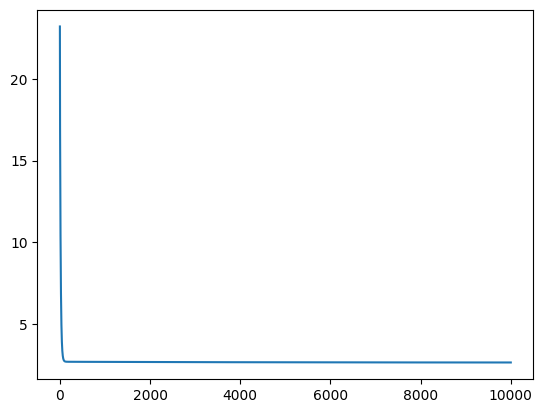

In [77]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [78]:
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)

In [79]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [80]:
coef_determination(y_test, predictions_test)

0.07288538183174198

In [81]:
coef_determination(y_train, predictions_train)

0.06813186366102175